In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from data_quality import *

In [2]:
clean_flights, dirty_flights = partition_data_files('tmp/FLIGHTS/*.csv')
clean_fb, dirty_fb = partition_data_files('tmp/FBPosts2/*.csv')

In [3]:
flights_clean_percent_null_df, flights_dirty_percent_null_df = percent_null_dataframes(clean_flights, dirty_flights)

In [4]:
fb_clean_percent_null_df, fb_dirty_percent_null_df = percent_null_dataframes(clean_fb, dirty_fb)

In [9]:
np.arange(flights_clean_percent_null_df.shape[1])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [11]:
flights_clean_percent_null_df.values[0]

array([0.04483479, 0.04403187, 0.04478548, 0.04675842, 0.0444524 ,
       0.04632241, 0.02948976, 0.02948403, 0.02702372, 0.03076703,
       0.0285278 , 0.03159845, 0.0289174 , 0.02318265, 0.02893891,
       0.02541462, 0.03016043, 0.02906228, 0.03009705, 0.0309509 ,
       0.02719787, 0.03250425, 0.02836721, 0.03008606, 0.02953647,
       0.03207693, 0.03204517, 0.02554803, 0.02981366, 0.03191817,
       0.02291826])

### Plots - Metric Analysis

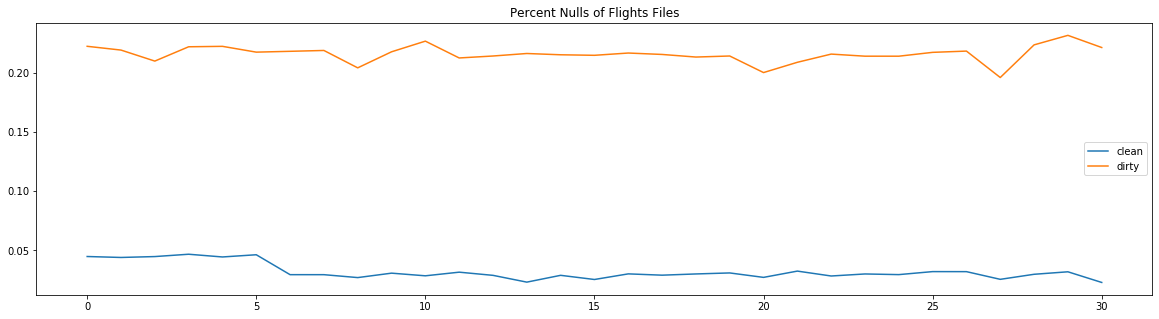

In [22]:
fig = plt.figure(figsize=(20,5))
plt.plot(np.arange(flights_clean_percent_null_df.shape[1]), flights_clean_percent_null_df.values[0], label = 'clean')
plt.plot(np.arange(flights_dirty_percent_null_df.shape[1]), flights_dirty_percent_null_df.values[0], label = 'dirty')
plt.legend(loc='center right')
plt.title('Percent Nulls of Flights Files')
fig.show()

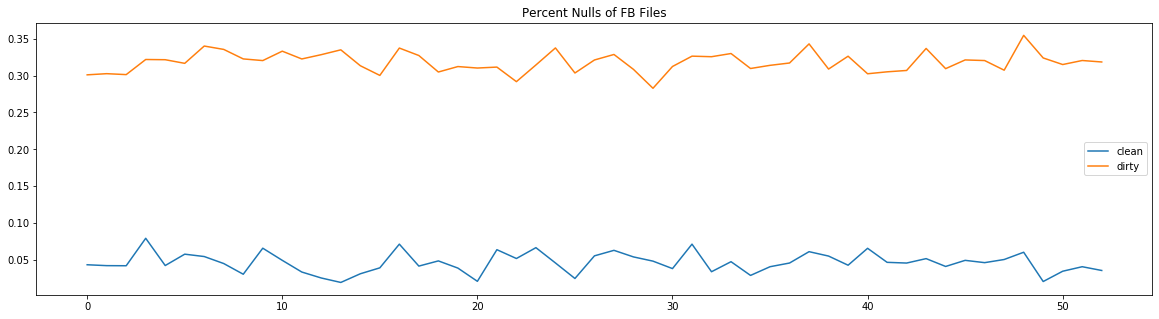

In [21]:
fig = plt.figure(figsize=(20,5))
plt.plot(np.arange(fb_clean_percent_null_df.shape[1]), fb_clean_percent_null_df.values[0], label = 'clean')
plt.plot(np.arange(fb_dirty_percent_null_df.shape[1]), fb_dirty_percent_null_df.values[0], label = 'dirty')
plt.legend(loc='center right')
plt.title('Percent Nulls of FB Files')
fig.show()

### Baseline analysis

In [26]:
print('Clean------------------------------\n',
      flights_clean_percent_null_df.mean(axis=1), 
      '\n\nDirty------------------------------\n',
      flights_dirty_percent_null_df.mean(axis=1))

Clean------------------------------
 0    0.032155
dtype: float64 

Dirty------------------------------
 0    0.215985
dtype: float64


In [27]:
print('Clean------------------------------\n',
      fb_clean_percent_null_df.mean(axis=1), 
      '\n\nDirty------------------------------\n',
      fb_dirty_percent_null_df.mean(axis=1))

Clean------------------------------
 0    0.046318
dtype: float64 

Dirty------------------------------
 0    0.318208
dtype: float64


In [28]:
fb_analysis = pd.DataFrame(columns=['train_type', 'batch_size', 'test_batch', 'clean_correct', 'dirty_correct'])
counter = 0

for train_type in ['rolling', 'increasing']:
    for batch_size in range(1, 10):
        for i in range(len(clean_fb)-batch_size):
            row = analysis(i, train_type, clean_fb, dirty_fb, batch_size, 'baseline')
            fb_analysis.loc[counter] = row
            counter = counter + 1


In [29]:
fb_analysis

,train_type,batch_size,test_batch,clean_correct,dirty_correct
0,rolling,1,0,False,True
1,rolling,1,1,False,True
2,rolling,1,2,False,True
3,rolling,1,3,False,True
4,rolling,1,4,False,True
...,...,...,...,...,...
859,increasing,9,39,True,True
860,increasing,9,40,True,True
861,increasing,9,41,True,True
862,increasing,9,42,True,True


In [30]:
fb_accuracy = get_accuracy(fb_analysis)

In [31]:
fb_accuracy

,train_type,batch_size,accuracy
0,increasing,1,0.942308
1,increasing,2,0.950980
2,increasing,3,0.960000
3,increasing,4,0.969388
4,increasing,5,0.968750
5,increasing,6,0.968085
6,increasing,7,0.967391
7,increasing,8,0.966667
8,increasing,9,0.977273
9,rolling,1,0.500000


In [32]:
flights_analysis = pd.DataFrame(columns=['train_type', 'batch_size', 'test_batch', 'clean_correct', 'dirty_correct'])
counter = 0

for train_type in ['rolling', 'increasing']:
    for batch_size in range(1, 10):
        for i in range(len(clean_flights)-batch_size):
            row = analysis(i, train_type, clean_flights, dirty_flights, batch_size, 'baseline')
            flights_analysis.loc[counter] = row
            counter = counter + 1

In [33]:
flights_accuracy = get_accuracy(flights_analysis)

In [34]:
flights_accuracy

,train_type,batch_size,accuracy
0,increasing,1,0.883333
1,increasing,2,0.896552
2,increasing,3,0.892857
3,increasing,4,0.907407
4,increasing,5,0.903846
5,increasing,6,0.900000
6,increasing,7,0.916667
7,increasing,8,0.934783
8,increasing,9,0.954545
9,rolling,1,0.500000


### Batch Accuracy Plots

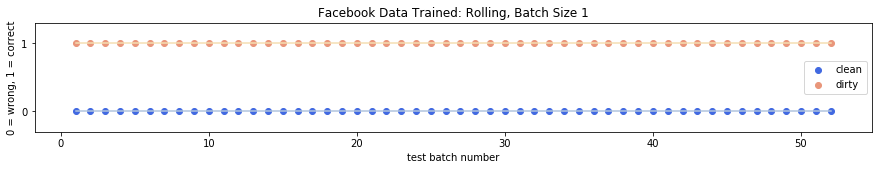

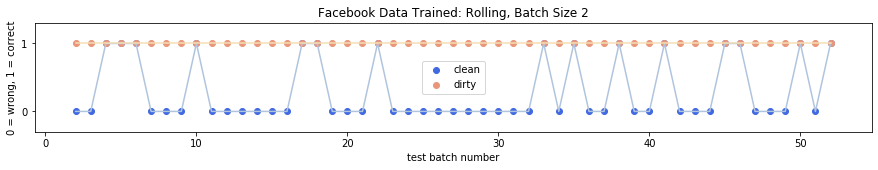

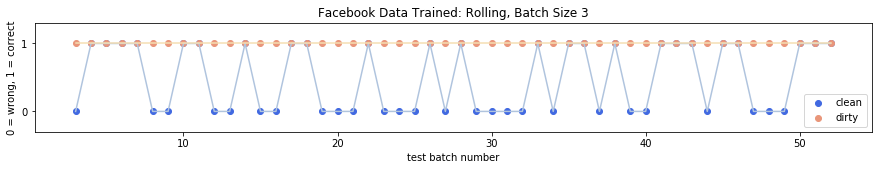

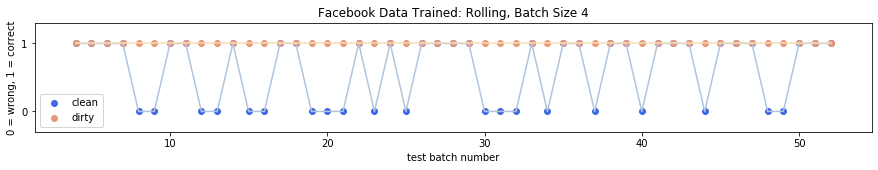

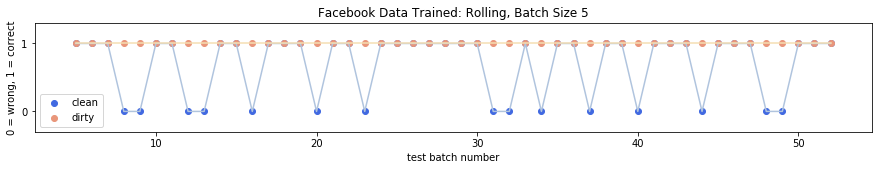

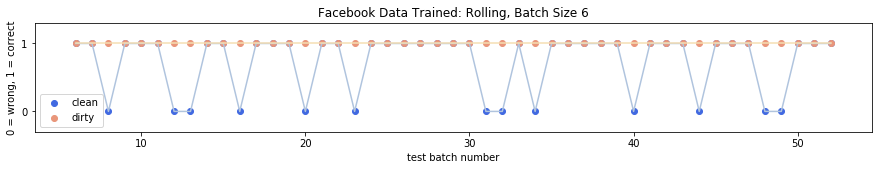

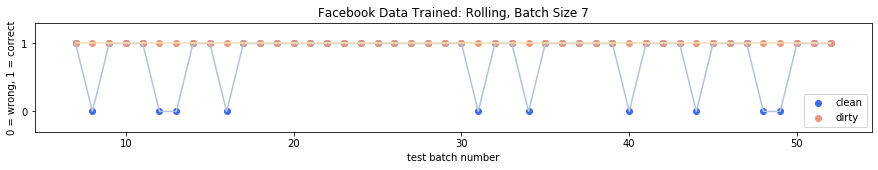

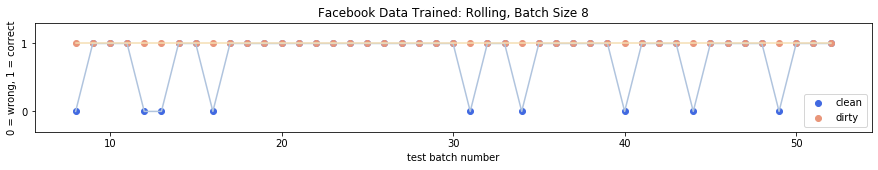

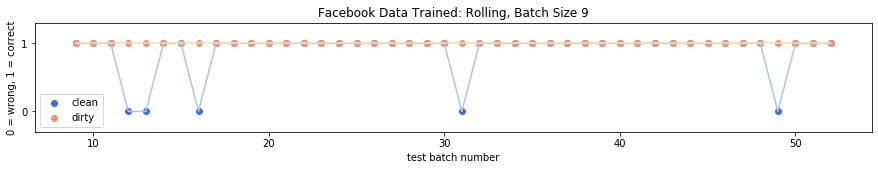

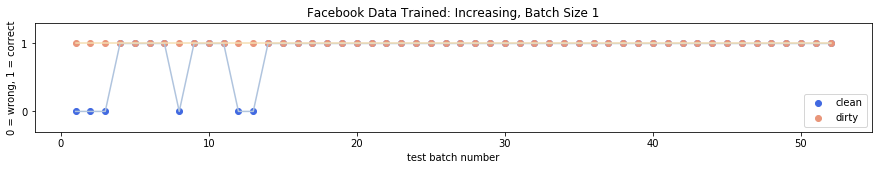

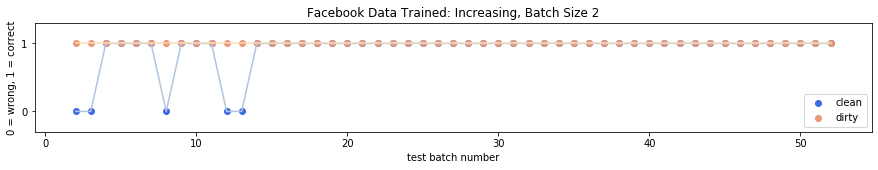

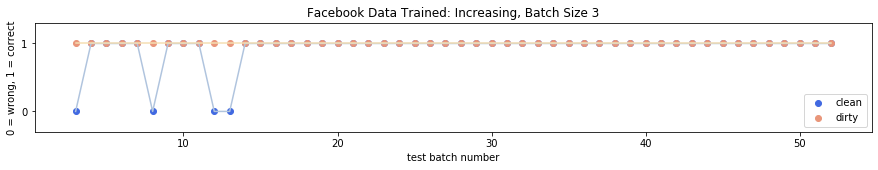

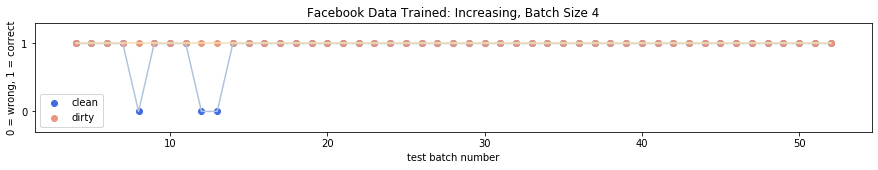

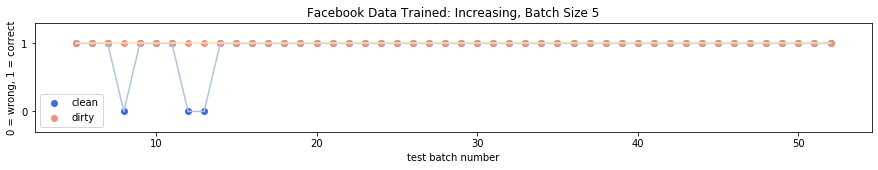

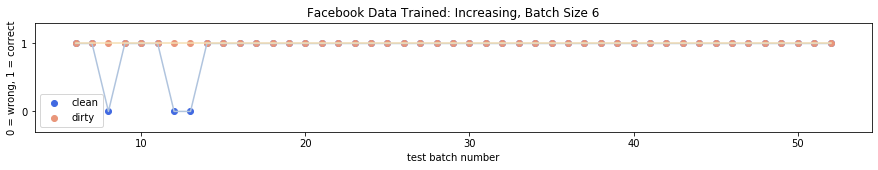

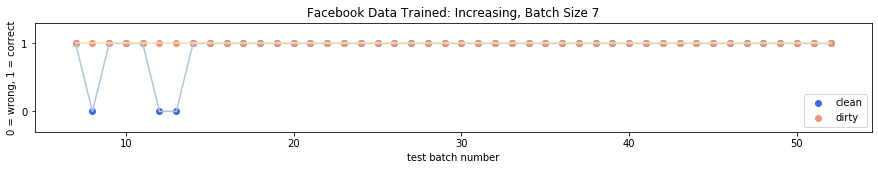

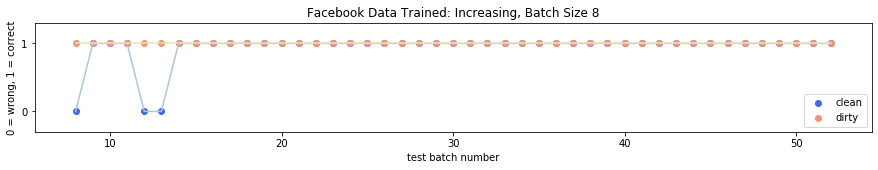

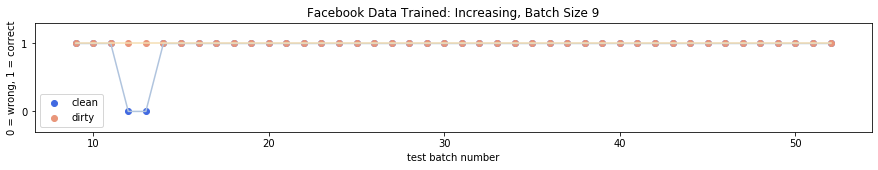

In [35]:
plot_batch('facebook', fb_analysis, range(1, 10))

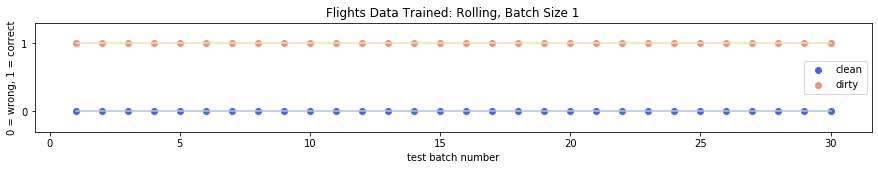

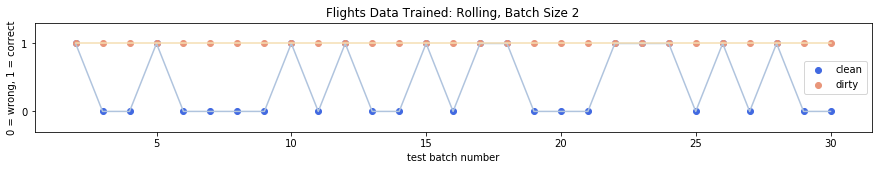

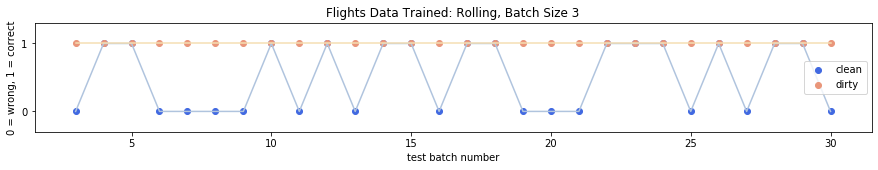

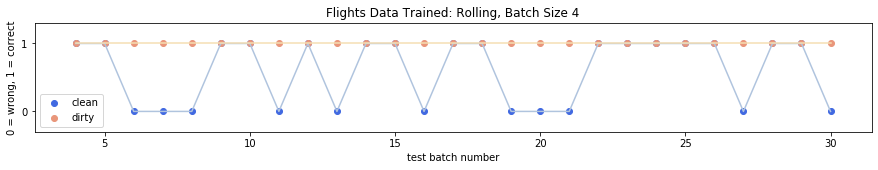

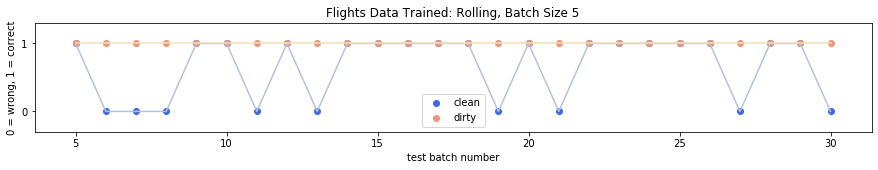

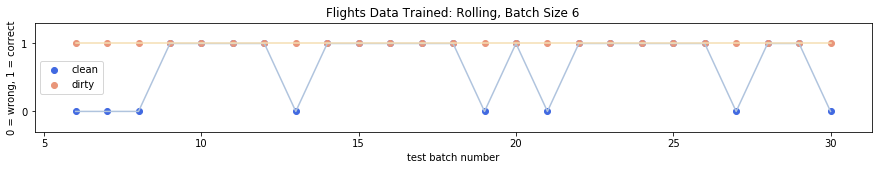

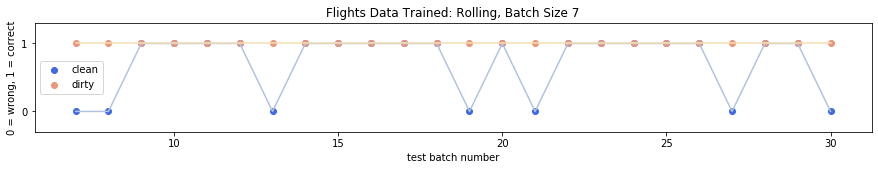

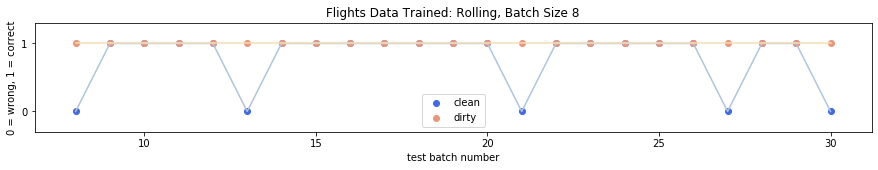

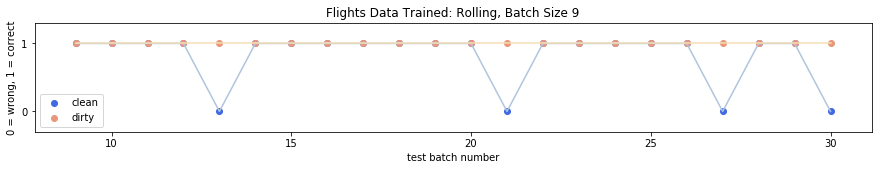

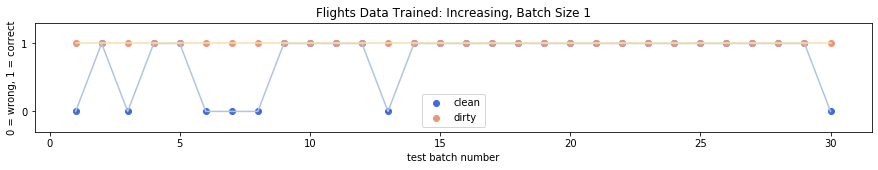

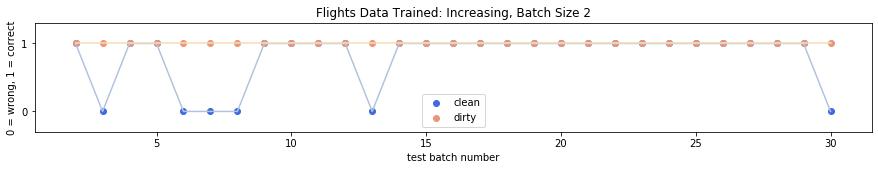

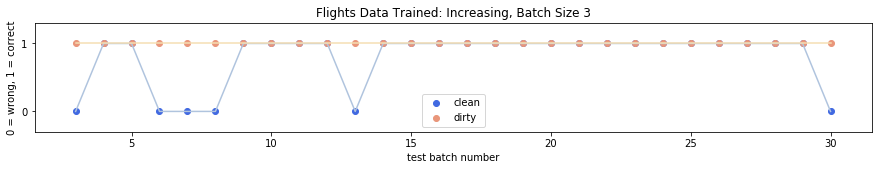

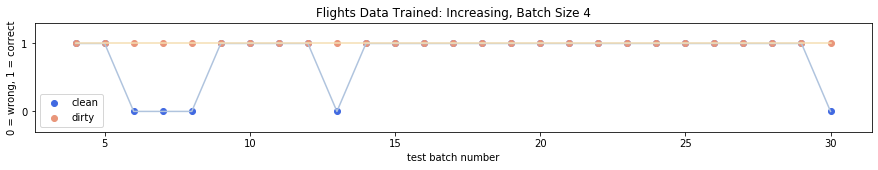

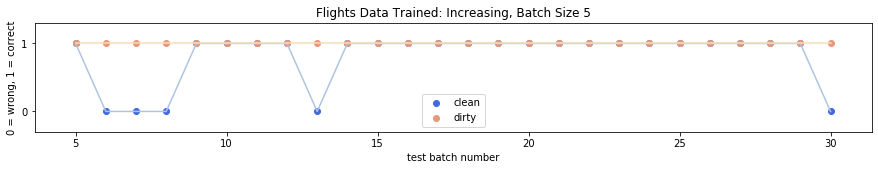

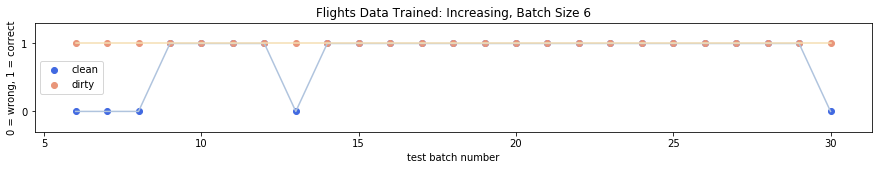

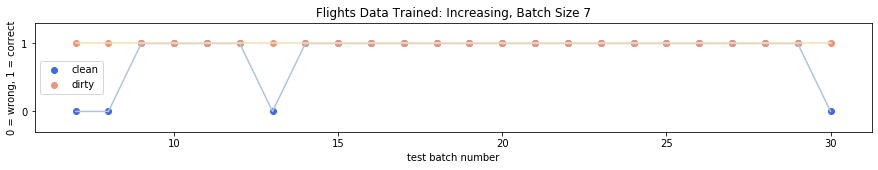

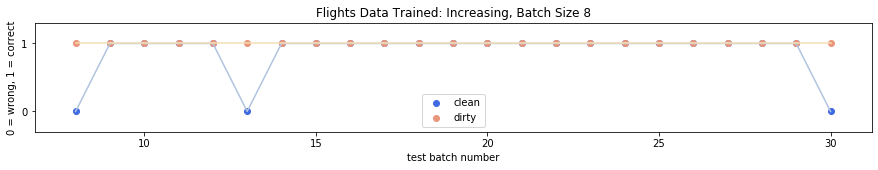

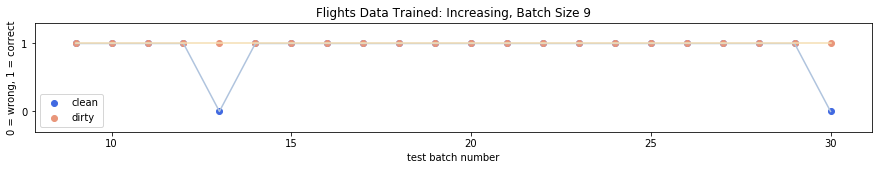

In [36]:
plot_batch('flights', flights_analysis, range(1, 10))

In [37]:
fb_accuracy.to_csv('fb_accuracy_baseline.csv', index = False)

In [38]:
flights_accuracy.to_csv('flights_accuracy_baseline.csv', index = False)

In [39]:
fb_analysis.to_csv('fb_batch_analysis_baseline.csv', index = False)

In [40]:
flights_analysis.to_csv('flights_batch_analysis_baseline.csv', index = False)